In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import cv2

In [4]:
import os

In [50]:
train_images = np.empty((17129,150,122,3), dtype=np.float64)

In [76]:
train_labels = np.empty((17129,1),dtype=np.uint8)

In [65]:
test_images = np.empty((200,150,122,3),dtype=np.float64)

In [77]:
test_labels = np.empty((200,1), dtype=np.uint8)

In [40]:
a=np.array([[[1,2,3],[4,5,6],[7,8,9]],[[10,11,12],[13,14,15],[16,17,18]]])

In [41]:
a.shape

(2, 3, 3)

In [51]:
path = "P_S" + "/{n:06}".format(n=1) + ".jpg"
img = cv2.imread(path,1)
img = cv2.resize(img,(122,150)) 
train_images[0][:][:][:] = img

In [9]:
class_names = ['Face','No Face']

In [56]:
for i in range(10000):
    path = "P_S" + "/{n:06}".format(n=i+1) + ".jpg"
    img = cv2.imread(path,1)
    img = cv2.resize(img,(122,150)) 
    train_images[i][:][:][:] = img
for i in range(7129):
    path = "N_S/" + str(i) + ".jpg"
    img = cv2.imread(path,1)
    img = cv2.resize(img,(122,150))
    train_images[i+10000][:][:][:] = img

In [80]:
for i in range(10000):
    train_labels[i][0] = 0
for i in range(7129):
    train_labels[i+10000][0] = 1

In [66]:
for i in range(200):
    path = "Test" + "/{n:06}".format(n=i+100001) + ".jpg"
    img = cv2.imread(path,1)
    img = cv2.resize(img,(122,150)) 
    test_images[i][:][:][:] = img

In [81]:
for i in range(200):
    test_labels[i][0] = 0

In [68]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [69]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 122, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [70]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [82]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5
536/536 [==============================] - 254s 472ms/step - loss: 0.0562 - accuracy: 0.9804 - val_loss: 9.5750e-05 - val_accuracy: 1.0000
Epoch 2/5
536/536 [==============================] - 277s 516ms/step - loss: 0.0142 - accuracy: 0.9958 - val_loss: 5.7823e-04 - val_accuracy: 1.0000
Epoch 3/5
536/536 [==============================] - 268s 499ms/step - loss: 0.0077 - accuracy: 0.9967 - val_loss: 3.1269e-04 - val_accuracy: 1.0000
Epoch 4/5
536/536 [==============================] - 261s 487ms/step - loss: 0.0128 - accuracy: 0.9953 - val_loss: 0.0074 - val_accuracy: 0.9950
Epoch 5/5
536/536 [==============================] - 266s 496ms/step - loss: 0.0073 - accuracy: 0.9981 - val_loss: 3.3160e-06 - val_accuracy: 1.0000


In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [111]:
test = np.empty((12,150,122,3),dtype=np.float64)

In [121]:
for i in range(12):
    img6 = cv2.imread(str(i+1) + ".jpg",1)
    img6 = cv2.resize(img6,(122,150))
    test[i][:][:][:] = img6

In [122]:
test = test/255.0

In [123]:
predictions = model.predict(test) # Make prediction

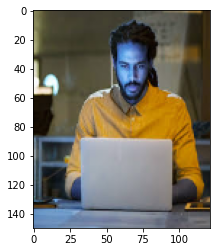

1


In [139]:
index=11
plt.imshow(test[index]) # Import the image
plt.show() # Show the image
print(np.argmax(predictions[index])) # Print out the number

In [140]:
model.save("my_model.h5")